In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import os
import numpy as np
import logging
snscolors = sns.color_palette("colorblind")
from copy import deepcopy
import pandas as pd
from chainconsumer import Chain, ChainConsumer, make_sample, Truth, ChainConfig, PlotConfig
import cosmicfishpie.analysis.fishconsumer as fco

In [2]:
def read_chain_parameters(chain_file):
    """Read parameter names from chain file header.
    
    Parameters
    ----------
    chain_file : str
        Path to the chain file
        
    Returns
    -------
    list
        List of parameter names
    """
    with open(chain_file, 'r') as f:
        # Read first line which contains parameters
        header_line = f.readline().strip()
        
        # Extract everything after "Parameters: "
        params_str = header_line.split("Parameters: ")[1]
        
        # Split into list and return
        return params_str.split()

In [3]:
maindir = './'

In [4]:
params_cols = ['Omegam', 'Omegab', 'h', 'ns', 'sigma8']

In [5]:
cjelly_3x2ph = maindir + '3x2photo-sample_wghlkl.txt'
photo_chain = fco.load_Nautilus_chains_from_txt(cjelly_3x2ph, param_cols=params_cols)

In [6]:
photo_chain.head()

Omegam    Omegab         h        ns    sigma8         weight  \
515  0.327258  0.050515  0.722039  0.965066  0.798853  1.977343e-315   
533  0.331828  0.045258  0.666812  0.935759  0.794325  6.719293e-322   
542  0.322565  0.046588  0.716583  0.974870  0.798834  3.270715e-321   
614  0.314216  0.041826  0.661449  0.938945  0.821862  5.004275e-315   
727  0.328011  0.059894  0.651766  0.978549  0.819065  1.268993e-318   

      posterior  
515 -730.618455  
533 -745.511270  
542 -743.931423  
614 -729.689917  
727 -737.969742

In [7]:
cjelly_spectro = maindir + 'cosmicjellyfish_eucid_spectro_nonuis.txt'
spectro_chain = fco.load_Nautilus_chains_from_txt(cjelly_spectro, param_cols=params_cols)


In [8]:
from cosmicfishpie.analysis import fisher_matrix as cf
from cosmicfishpie.analysis import fisher_operations as cfop

In [9]:
fish_path = './results/CosmicFish_v1.2.0_GCsp_GCsp_fishermatrix.txt'
fish_spectro = cf.fisher_matrix(file_name=fish_path)
print(fish_spectro.get_param_names())

['Omegam', 'Omegab', 'h', 'ns', 'sigma8', 'Ps_1', 'Ps_2', 'Ps_3', 'Ps_4', 'lnbg_1', 'lnbg_2', 'lnbg_3', 'lnbg_4']


In [10]:
params_cols

['Omegam', 'Omegab', 'h', 'ns', 'sigma8']

In [11]:
fish_spectro_nonui = cfop.reshuffle(fish_spectro, names = params_cols)
fish_spectro_nonui.get_param_names()

['Omegam', 'Omegab', 'h', 'ns', 'sigma8']

In [12]:
euclid_truth_values = dict(zip(fish_spectro.get_param_names(), fish_spectro.get_param_fiducial()))
euclid_truth_values


{'Omegam': 0.314571,
 'Omegab': 0.049199,
 'h': 0.6737,
 'ns': 0.96605,
 'sigma8': 0.81,
 'Ps_1': 0.0,
 'Ps_2': 0.0,
 'Ps_3': 0.0,
 'Ps_4': 0.0,
 'lnbg_1': 0.37945,
 'lnbg_2': 0.473806,
 'lnbg_3': 0.557602,
 'lnbg_4': 0.641257}

In [13]:
fish_path='./results/CosmicFish_v1.2.0_photo_3x2pt_WLGCph_fishermatrix.txt'
fish_photo = cf.fisher_matrix(file_name=fish_path)
print(f"fish_photo.get_param_names() = {fish_photo.get_param_names()}")
fish_photo_nonui = cfop.reshuffle(fish_photo, names = params_cols)
print(f"fish_photo_nonui.get_param_names() = {fish_photo_nonui.get_param_names()}")

fish_photo.get_param_names() = ['Omegam', 'Omegab', 'h', 'ns', 'sigma8', 'b1', 'b2', 'b3', 'b4', 'b5', 'b6', 'b7', 'b8', 'b9', 'b10', 'AIA', 'betaIA', 'etaIA']
fish_photo_nonui.get_param_names() = ['Omegam', 'Omegab', 'h', 'ns', 'sigma8']


In [14]:
params_photo_fish = fish_photo.get_param_names()
print(params_photo_fish)
print(len(params_photo_fish))

['Omegam', 'Omegab', 'h', 'ns', 'sigma8', 'b1', 'b2', 'b3', 'b4', 'b5', 'b6', 'b7', 'b8', 'b9', 'b10', 'AIA', 'betaIA', 'etaIA']
18


In [15]:
cjelly_3x2ph_withnuis = maindir + 'cosmicjellyfish_eucid_photo_all.txt'
params_photo_jelly = read_chain_parameters(cjelly_3x2ph_withnuis)
print(params_photo_jelly)
print(len(params_photo_jelly))
photo_chain_withnuis = fco.load_Nautilus_chains_from_txt(cjelly_3x2ph_withnuis, param_cols=params_photo_jelly)

['Omegam', 'Omegab', 'h', 'ns', 'sigma8', 'AIA', 'etaIA', 'b1', 'b2', 'b3', 'b4', 'b5', 'b6', 'b7', 'b8', 'b9', 'b10']
17


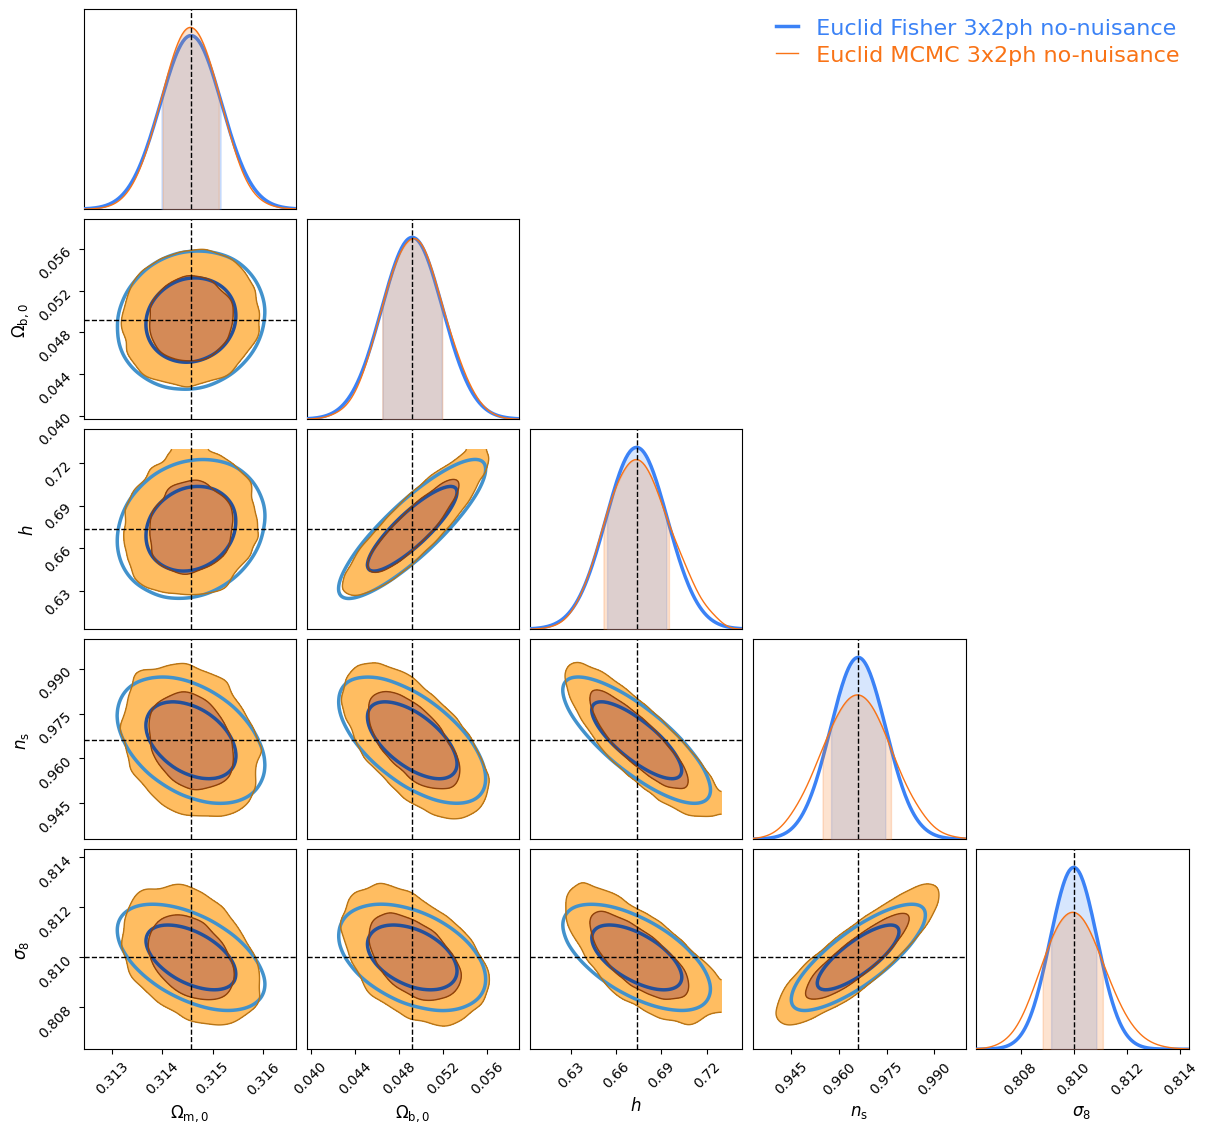

In [16]:
euclid_photo_fig = fco.make_triangle_plot(
    chains=[photo_chain],
    fishers=[
        fish_photo_nonui
        ],
    colors=[
        'blue',
        'orange' 
        ],
    chain_labels=[
        'Euclid MCMC 3x2ph no-nuisance'
        ],
    fisher_labels=[
        'Euclid Fisher 3x2ph no-nuisance'
        ],
    truth_values=euclid_truth_values,
    params=params_cols,
    smooth=10,
    #kde=1.1,
    bins=15
)

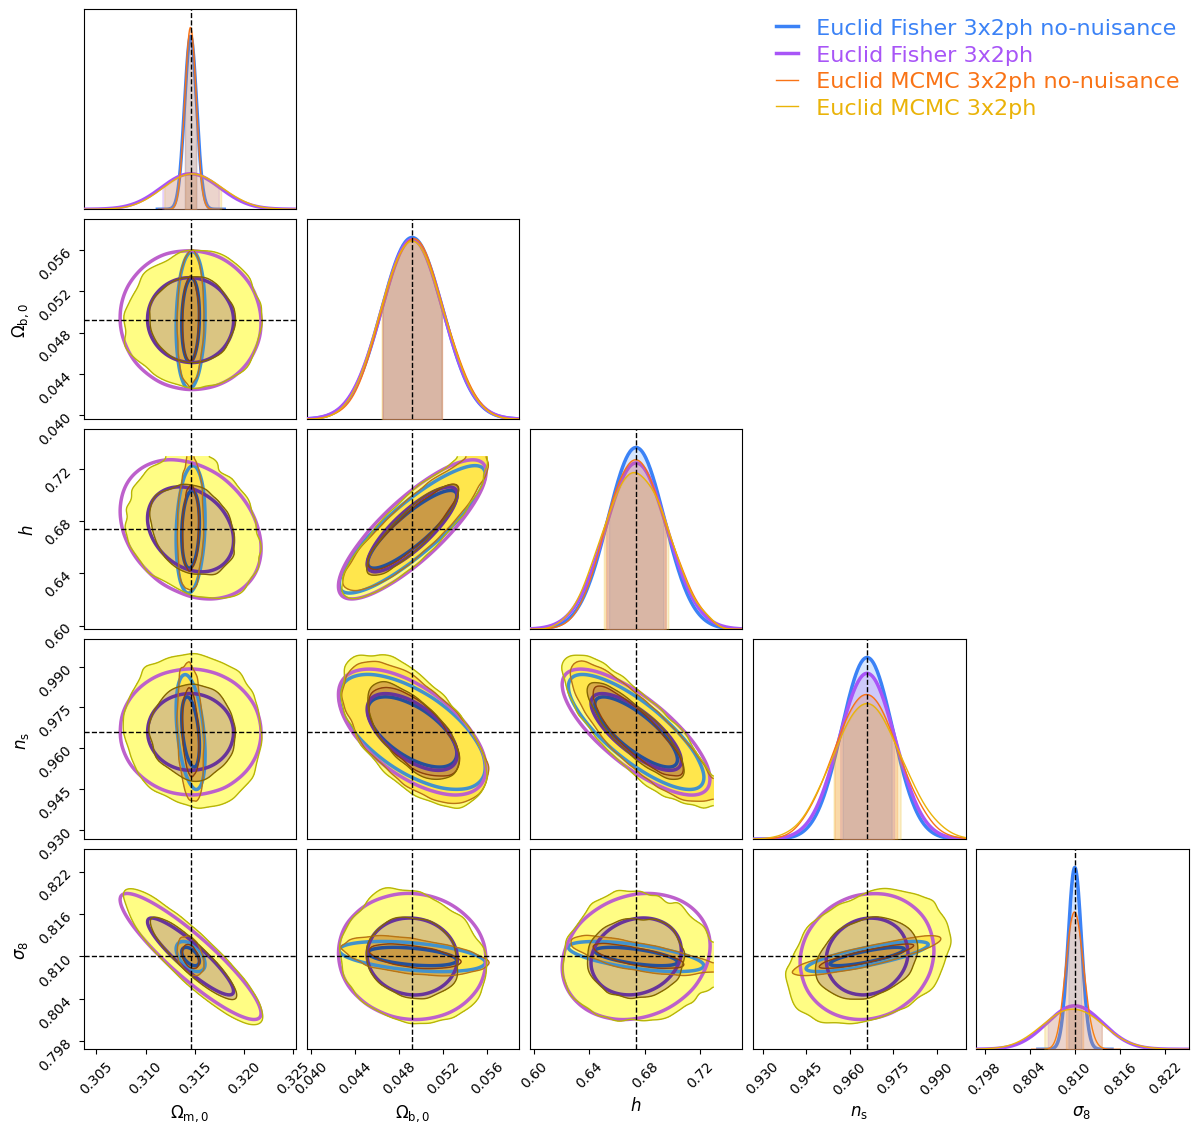

In [17]:
euclid_photo_fig = fco.make_triangle_plot(
    chains=[
            photo_chain, 
            photo_chain_withnuis
            ],
    fishers=[
        fish_photo_nonui,
        fish_photo
        ],
    colors=[
        'blue',
        'purple',
        'orange',
        'yellow' 
        ],
    chain_labels=[
        'Euclid MCMC 3x2ph no-nuisance',
        'Euclid MCMC 3x2ph'
        ],
    fisher_labels=[
        'Euclid Fisher 3x2ph no-nuisance',
        'Euclid Fisher 3x2ph'
        ],
    truth_values=euclid_truth_values,
    params=params_cols,
    smooth=10,
    #kde=1.1,
    bins=15
)

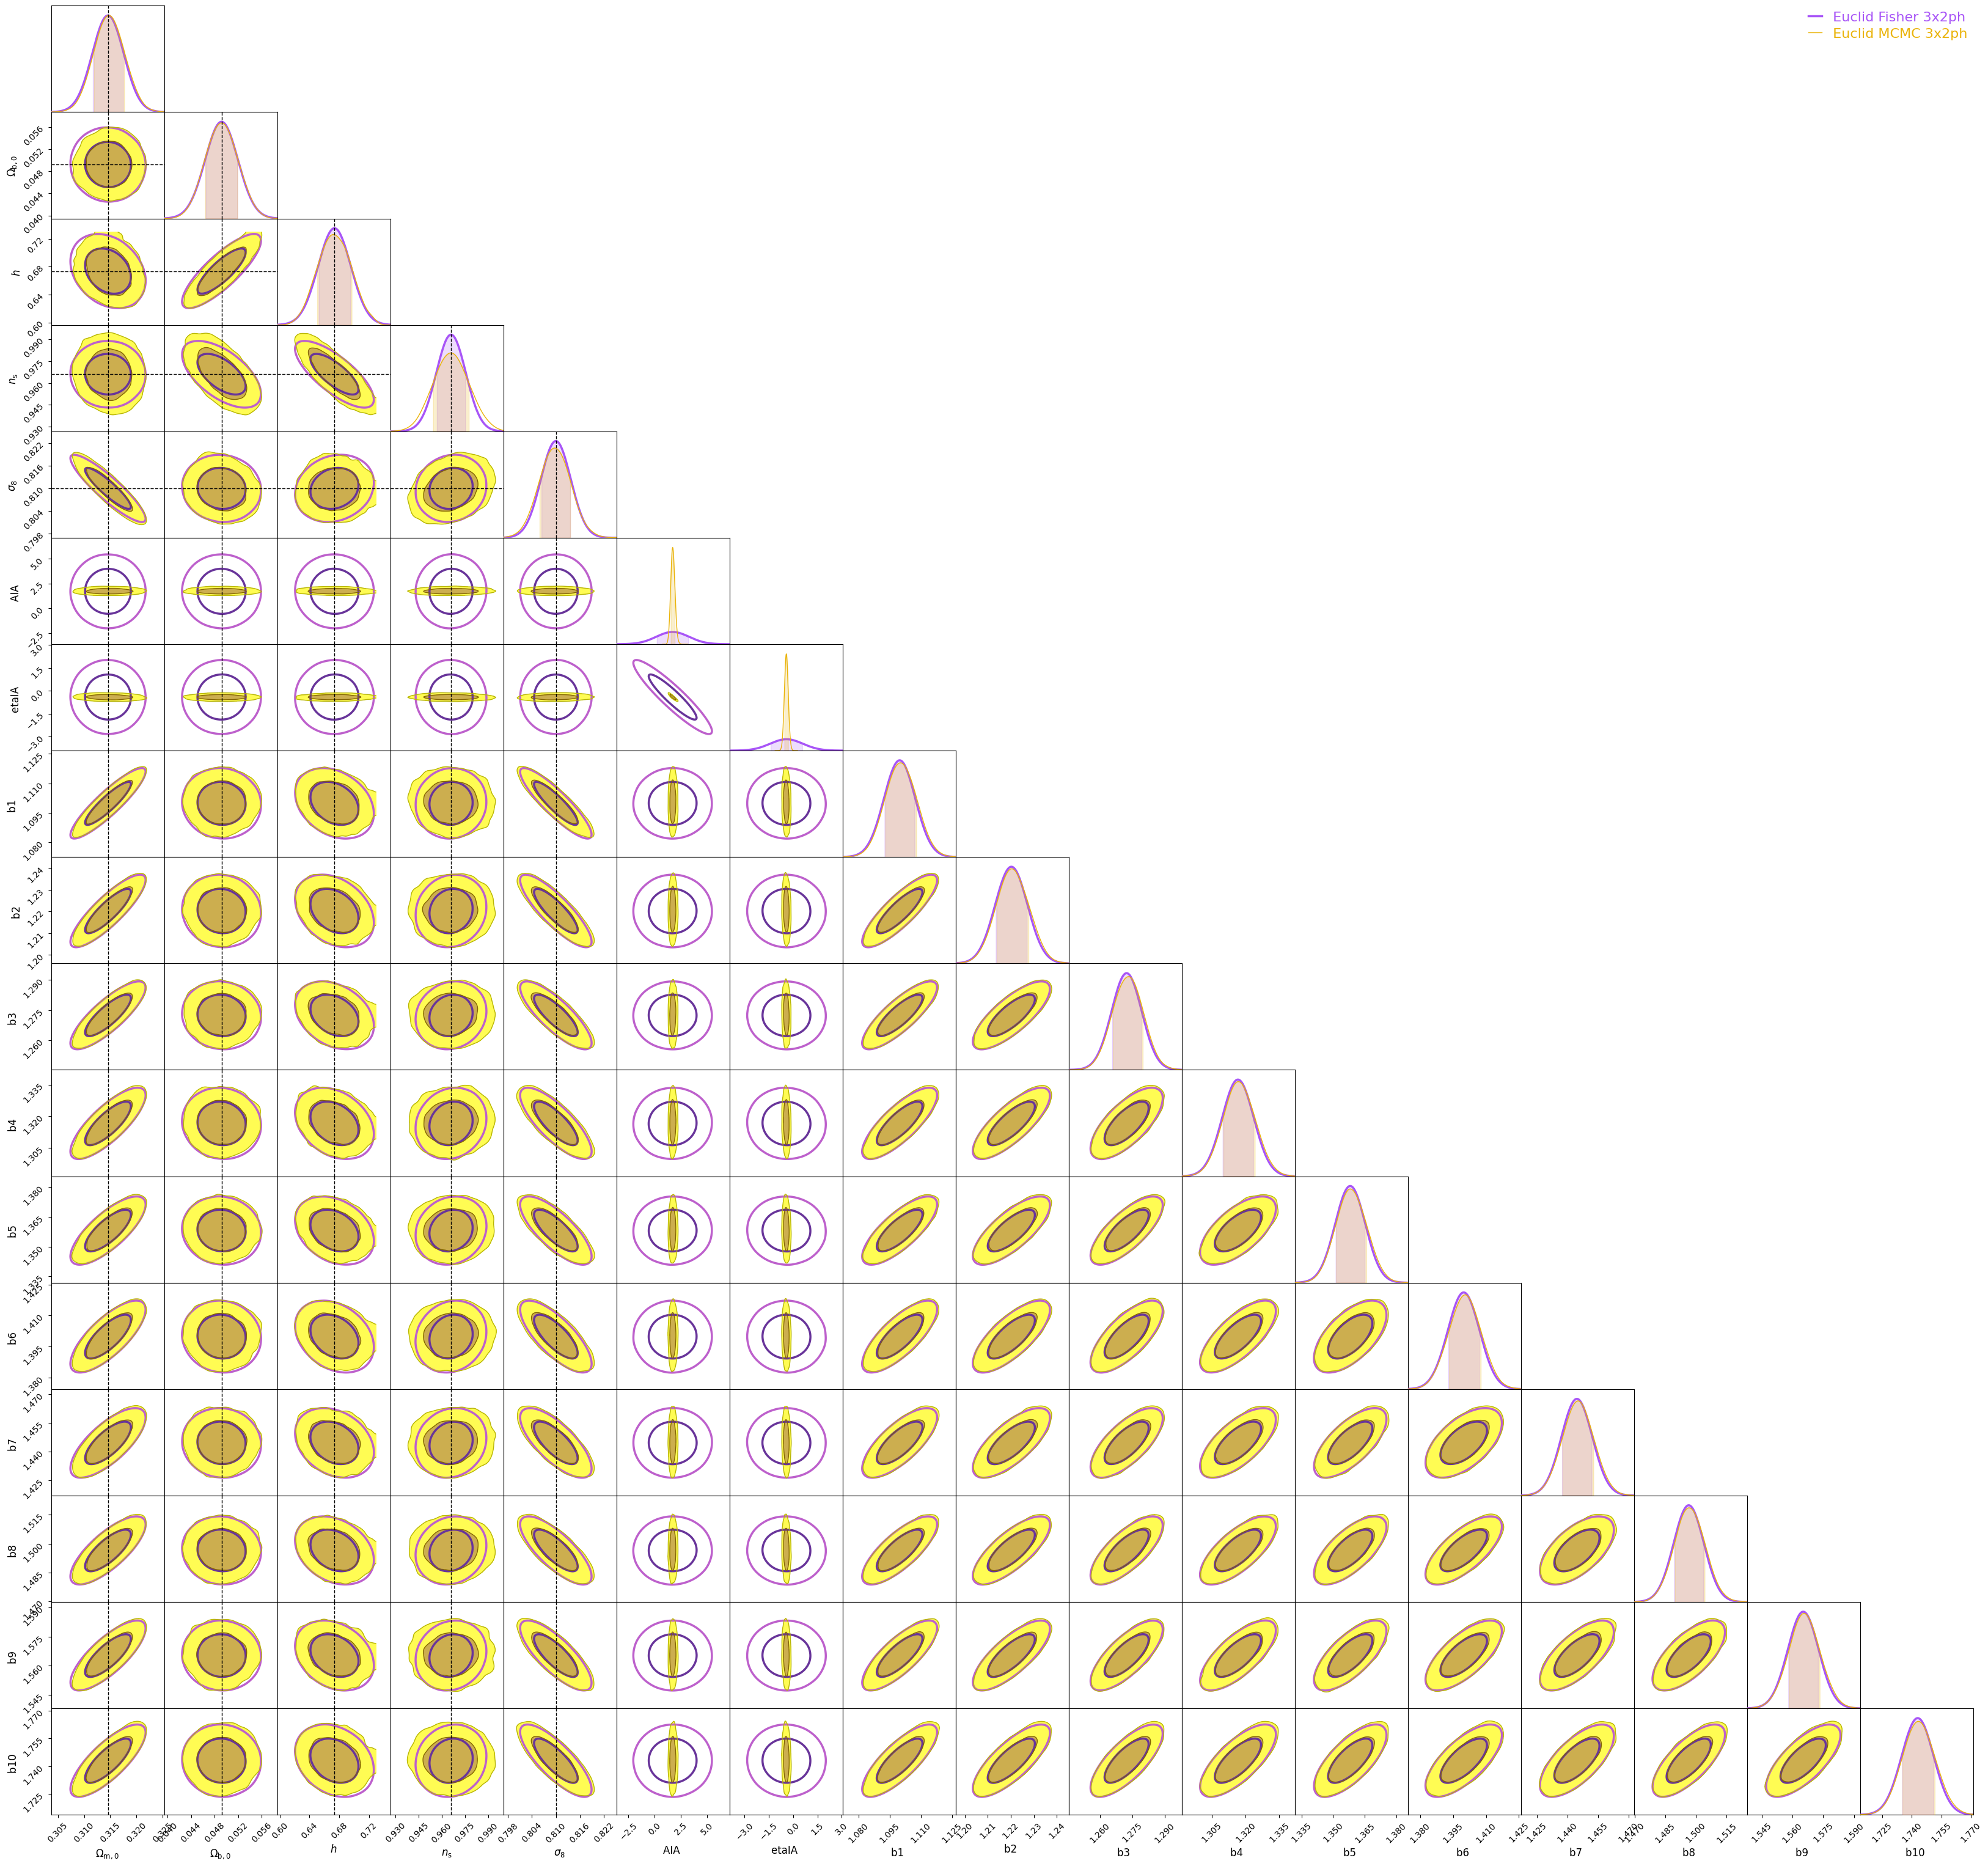

In [18]:
euclid_photo_fig_withnuis = fco.make_triangle_plot(
    chains=[photo_chain_withnuis],
    fishers=[
        fish_photo
        ],
    colors=[
        'purple',
        'yellow' 
        ],
    chain_labels=[
        'Euclid MCMC 3x2ph'
        ],
    fisher_labels=[
        'Euclid Fisher 3x2ph'
        ],
    truth_values=euclid_truth_values,
    params=params_photo_jelly,
    smooth=10,
    #kde=1.1,
    bins=15
)

In [19]:
params_spectro_all = fish_spectro.get_param_names()
print(params_spectro_all)
print(len(params_spectro_all))

['Omegam', 'Omegab', 'h', 'ns', 'sigma8', 'Ps_1', 'Ps_2', 'Ps_3', 'Ps_4', 'lnbg_1', 'lnbg_2', 'lnbg_3', 'lnbg_4']
13


In [20]:
cjelly_spectro_all = maindir + 'cosmicjellyfish_eucid_spectro_all.txt'
spectro_chain_all = fco.load_Nautilus_chains_from_txt(cjelly_spectro_all, 
                                                      param_cols=params_spectro_all)

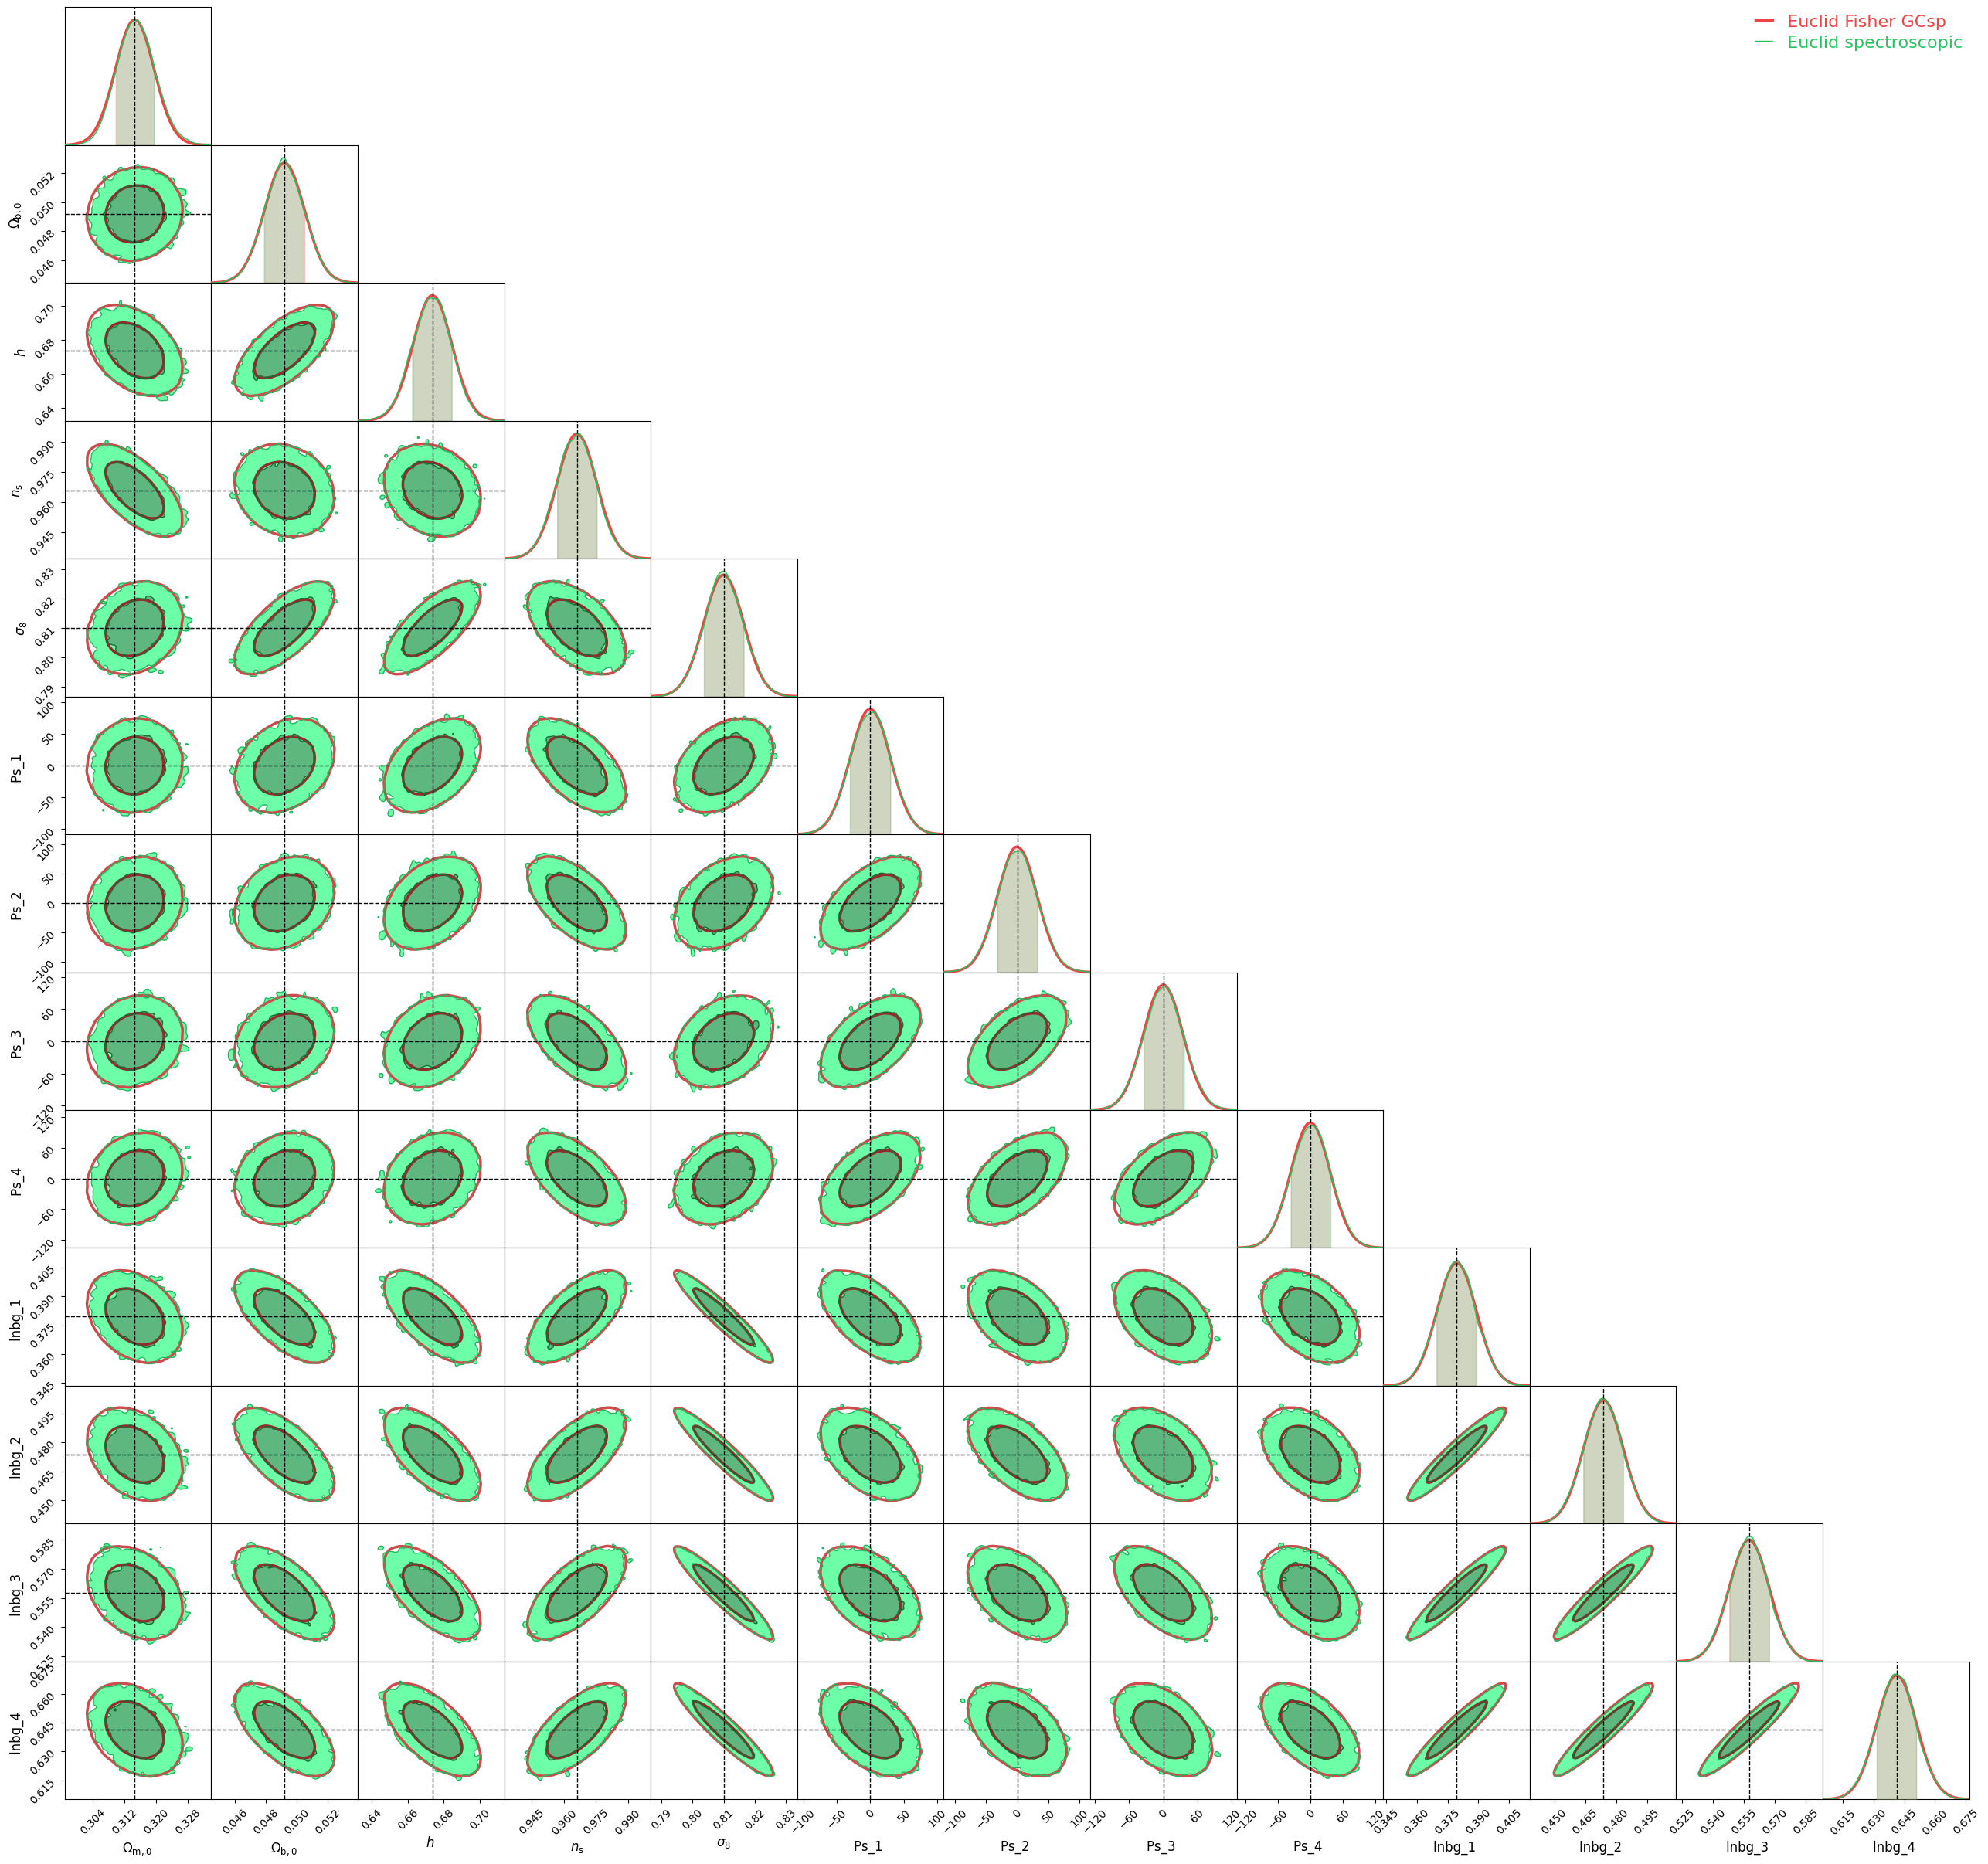

In [21]:
euclid_sp_all = fco.make_triangle_plot(
    chains=[
        spectro_chain_all
        ],
    fishers=[
        fish_spectro, 
        #fish_nonui
        ],
    colors=[
        #'purple', 
        'red', 
        'green' 
       # 'orange'
        ],
    chain_labels=[
        'Euclid spectroscopic'
        #'Euclid 3x2photo no-nuisance'
        ],
    fisher_labels=[
        #'Euclid Fisher GCsp', 
        'Euclid Fisher GCsp'
        ],
    truth_values=euclid_truth_values,
    params=params_spectro_all
)

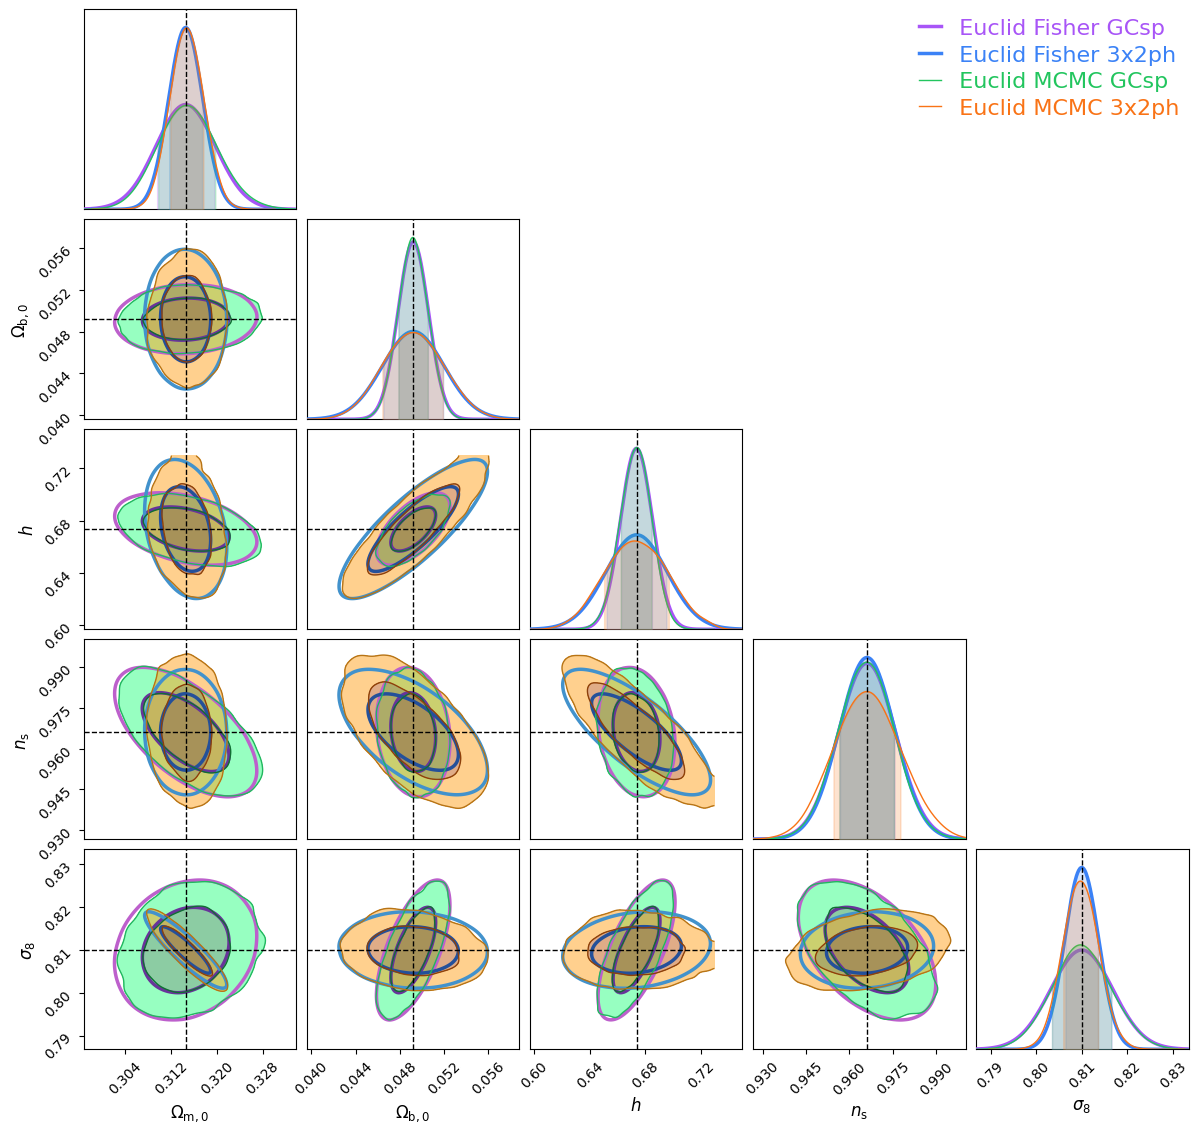

In [22]:

euclid_sp_all = fco.make_triangle_plot(
    chains=[
        spectro_chain_all,
        photo_chain_withnuis
        ],
    fishers=[
        fish_spectro, 
        fish_photo
        ],
    colors=[
        'purple', 
        'blue', 
        'green', 
        'orange'
        ],
    chain_labels=[
        'Euclid MCMC GCsp',
        'Euclid MCMC 3x2ph'
        ],
    fisher_labels=[
        'Euclid Fisher GCsp', 
        'Euclid Fisher 3x2ph'
        ],
    truth_values=euclid_truth_values,
    params=params_cols,
    smooth=10,
    bins=15
)

In [23]:
params_cols


['Omegam', 'Omegab', 'h', 'ns', 'sigma8']

In [24]:
cjelly_spectro_nonui_vs_camb = maindir + 'cosmicjellyfish_eucid_spectro_nonuis_vs_camb.txt'
spectro_chain_nonui_vs_camb = fco.load_Nautilus_chains_from_txt(cjelly_spectro_nonui_vs_camb, 
                                                      param_cols=params_cols)


In [25]:
cjelly_spectro_nonui = maindir + 'cosmicjellyfish_eucid_spectro_nonuis.txt'
spectro_chain_nonui = fco.load_Nautilus_chains_from_txt(cjelly_spectro_nonui, 
                                                      param_cols=params_cols)


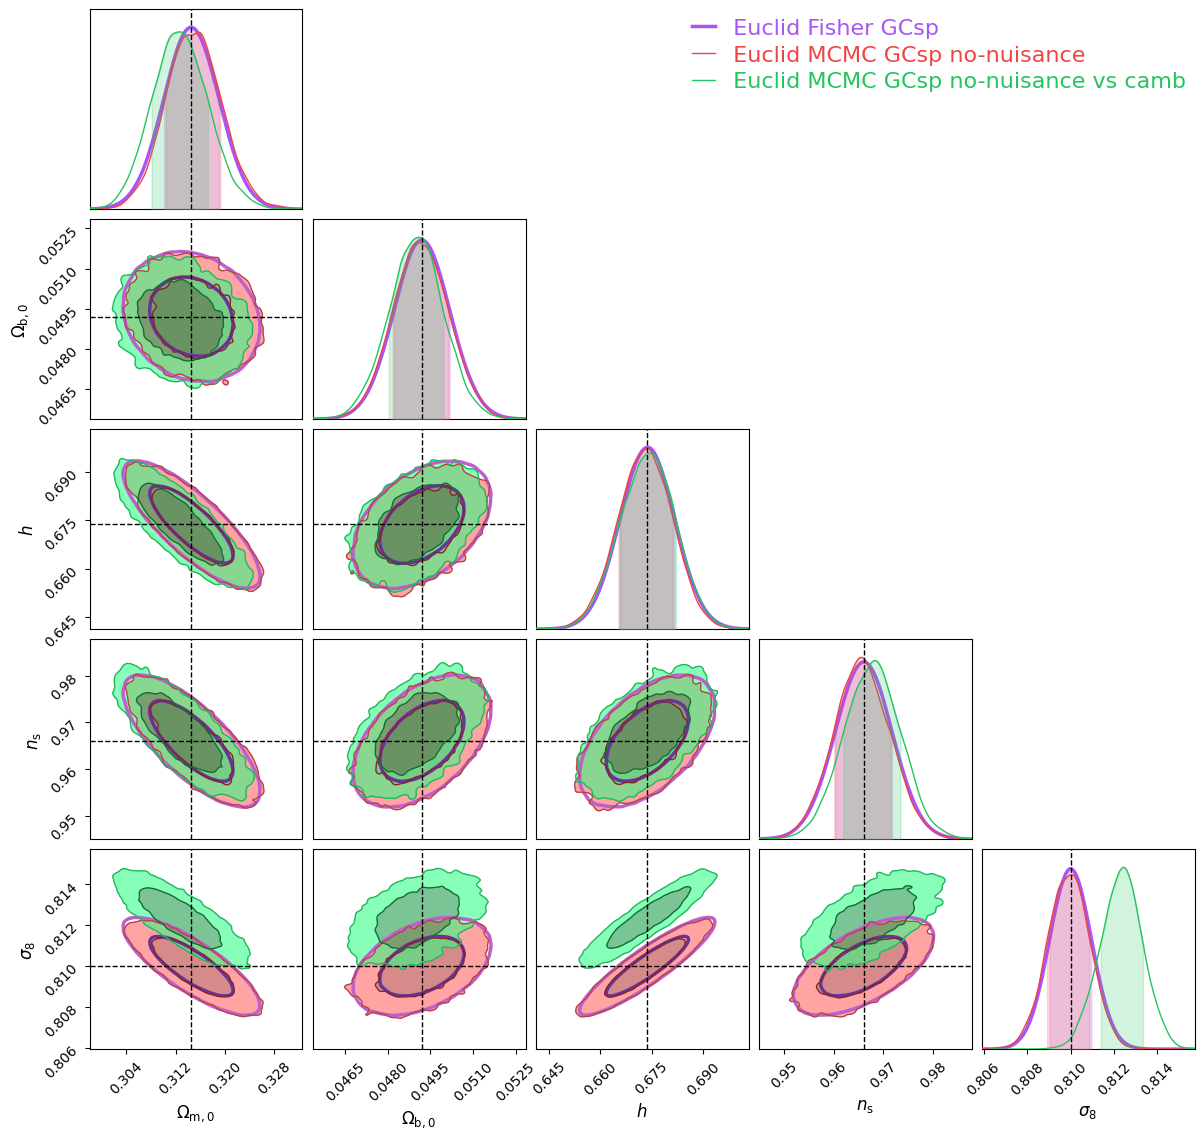

In [26]:
euclid_sp_nonui = fco.make_triangle_plot(
    chains=[
        spectro_chain_nonui,
        spectro_chain_nonui_vs_camb
        ],
    fishers=[
        fish_spectro_nonui, 
        ],
    colors=[
        'purple', 
        'red', 
        'green' 
       # 'orange'
        ],
    chain_labels=[
        'Euclid MCMC GCsp no-nuisance',
        'Euclid MCMC GCsp no-nuisance vs camb'
        ],
    fisher_labels=[
        'Euclid Fisher GCsp'
        ],
    truth_values=euclid_truth_values,
    params=params_cols
)

In [27]:
cjelly_spectro_legendre_nonui = maindir + 'cosmicjellyfish_eucid_spectro_legendre_nonuis.txt'
spectro_chain_legendre_nonui = fco.load_Nautilus_chains_from_txt(cjelly_spectro_legendre_nonui, 
                                                      param_cols=params_cols)

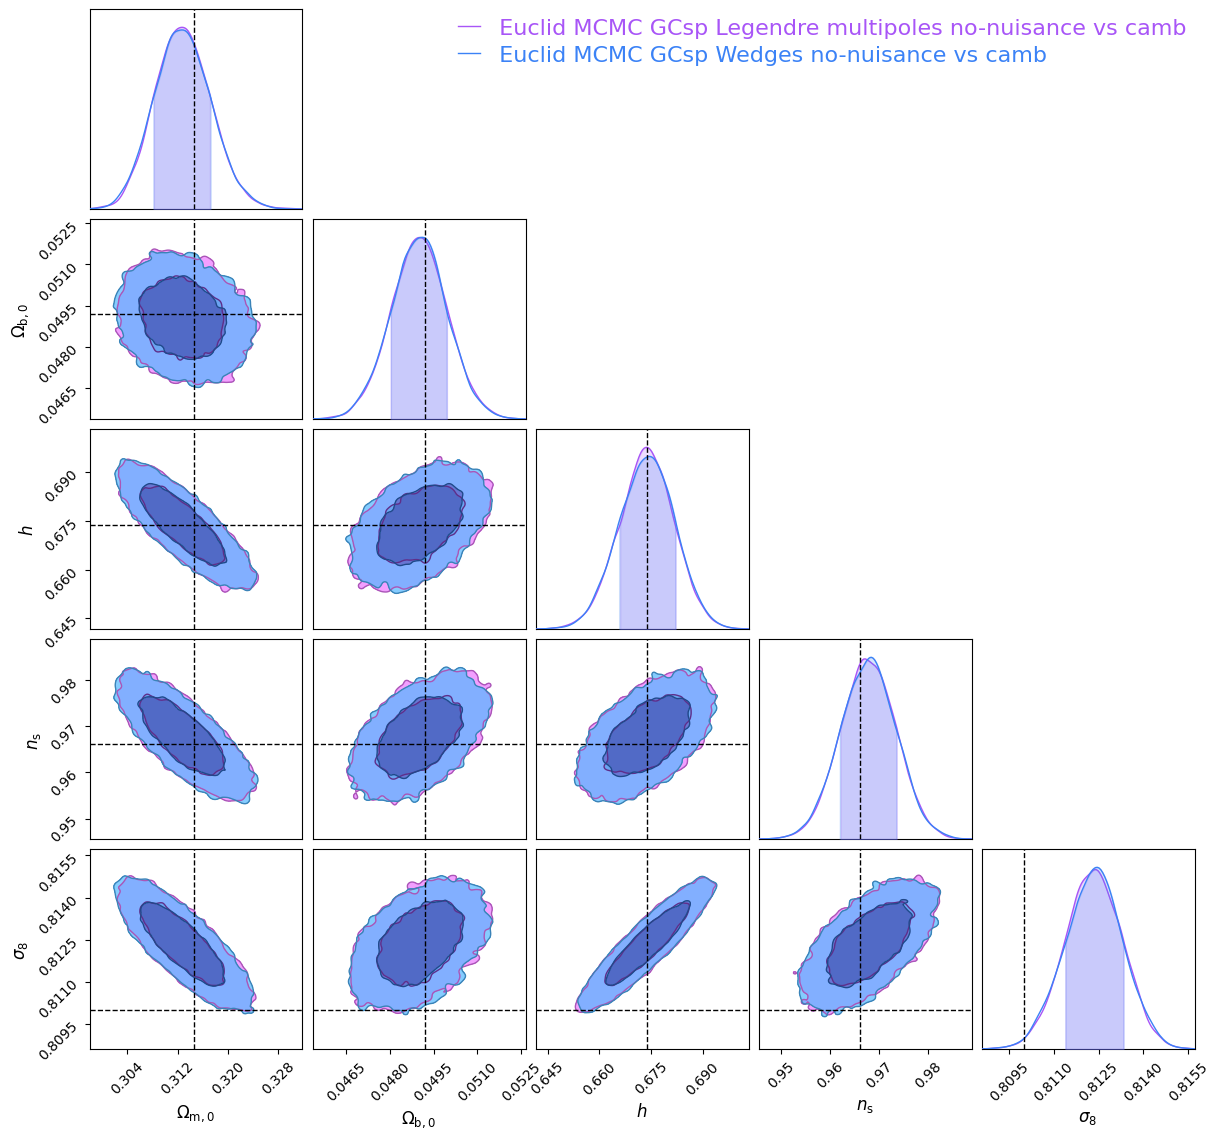

In [30]:
euclid_sp_legendre_nonui = fco.make_triangle_plot(
    chains=[
        spectro_chain_legendre_nonui,
        spectro_chain_nonui_vs_camb
        ],
    #fishers=[
    #    fish_spectro_nonui, 
    #    ],
    colors=[
        'purple', 
        'blue', 
        'green' 
       # 'orange'
        ],
    chain_labels=[
        'Euclid MCMC GCsp Legendre multipoles no-nuisance vs camb',
        'Euclid MCMC GCsp Wedges no-nuisance vs camb'
        ],
    #fisher_labels=[
    #    'Euclid Fisher GCsp'
    #    ],
    truth_values=euclid_truth_values,
    params=params_cols
)

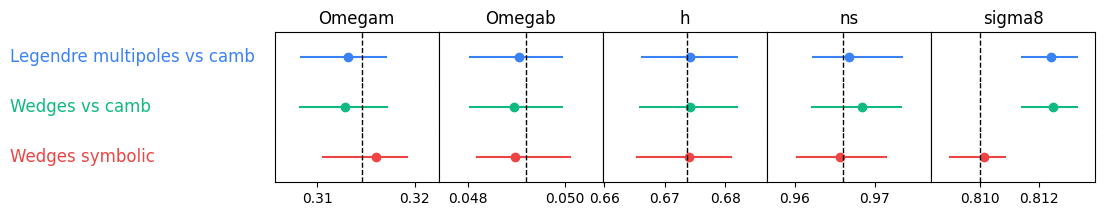

In [39]:
c = ChainConsumer()
c.add_chain(Chain(samples=spectro_chain_legendre_nonui, name='Legendre multipoles vs camb'))
c.add_chain(Chain(samples=spectro_chain_nonui_vs_camb, name='Wedges vs camb'))
c.add_chain(Chain(samples=spectro_chain_nonui, name='Wedges symbolic'))
c.add_truth(Truth(location=euclid_truth_values, linestyle='--', color='black'))
#c.set_plot_config(PlotConfig(blind=["sigma8"]))
fig = c.plotter.plot_summary(errorbar=True)
fig.savefig('euclid_sp_legendre_nonui-comparisons.png')

In [47]:
##%%latex
print(c.analysis.get_latex_table(transpose=True))


\begin{table}
    \centering
    \caption{}
    \label{tab:model_params}
    \begin{tabular}{cccc}
        \hline
		Parameter & Legendre multipoles vs camb & Wedges vs camb & Wedges symbolic \\ 
		\hline
		Omegam & $\left( 313.1^{+4.0}_{-4.9} \right) \times 10^{-3}$ & $\left( 312.8^{+4.4}_{-4.7} \right) \times 10^{-3}$ & $\left( 316.0^{+3.3}_{-5.6} \right) \times 10^{-3}$ \\ 
		Omegab & $\left( 490.6^{+8.9}_{-10.4} \right) \times 10^{-4}$ & $\left( 489.5^{+10.0}_{-9.1} \right) \times 10^{-4}$ & $\left( 489.8^{+11.5}_{-8.1} \right) \times 10^{-4}$ \\ 
		h & $\left( 674.2^{+8.0}_{-8.1} \right) \times 10^{-3}$ & $\left( 674.1^{+8.0}_{-8.3} \right) \times 10^{-3}$ & $\left( 674.0^{+7.2}_{-8.8} \right) \times 10^{-3}$ \\ 
		ns & $\left( 966.8^{+6.8}_{-4.6} \right) \times 10^{-3}$ & $\left( 968.4^{+5.1}_{-6.4} \right) \times 10^{-3}$ & $\left( 965.6^{+5.9}_{-5.5} \right) \times 10^{-3}$ \\ 
		sigma8 & $\left( 8124.0^{+9.2}_{-10.2} \right) \times 10^{-4}$ & $\left( 8124.9^{+8.5}_{-11.0} \righ

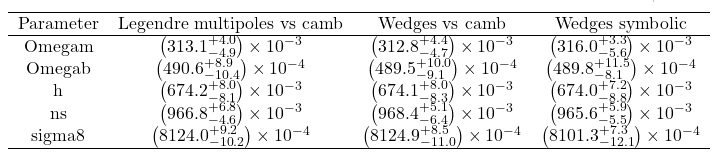

In [56]:
from chainconsumer.analysis import Analysis as anal

In [59]:
analy = anal(c)

In [62]:
aa= Chain(samples=spectro_chain_legendre_nonui, name='Legendre multipoles vs camb')

In [73]:
ttx = analy.get_parameter_text(analy.get_parameter_summary(aa, 'Omegam'), wrap=False)


In [74]:
from IPython.display import Math
Math(ttx)

<IPython.core.display.Math object>